In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import confusion_matrix

In [2]:
data = {
    "indobertweet" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/5.csv",
        }
    },
    "cnn" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/5.csv",
        }
    },
    "fasttext" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/5.csv",
        }
    },
}

model_name_dict = {
    "indobertweet" : "IndoBERTweet",
    "cnn": "CNN",
    "fasttext": "fastText"
}

In [3]:
# Helper function

list_stopword = []
with open("../../../data/5. Result Analysis/Error Analysis/tala-stopwords-indonesia.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        list_stopword.append(line.strip())

def word_counter(strings_list):
    words_dict = {}
    for string in strings_list:
        for word in string.split():
            if word in list_stopword:
                continue
            if word not in words_dict:
                words_dict[word] = 1
            else:
                words_dict[word] += 1
    words_df = pd.DataFrame(list(words_dict.items()), columns=['word', 'count'])
    words_df.sort_values('count', ascending=False, inplace=True)
    words_df.reset_index(drop=True, inplace=True)
    return words_df


In [4]:
for model in data:
    data[model]['df'] = {}
    for scenario in data[model]['data_path']:
        data[model]['df'][scenario] = pd.read_csv(data[model]['data_path'][scenario])

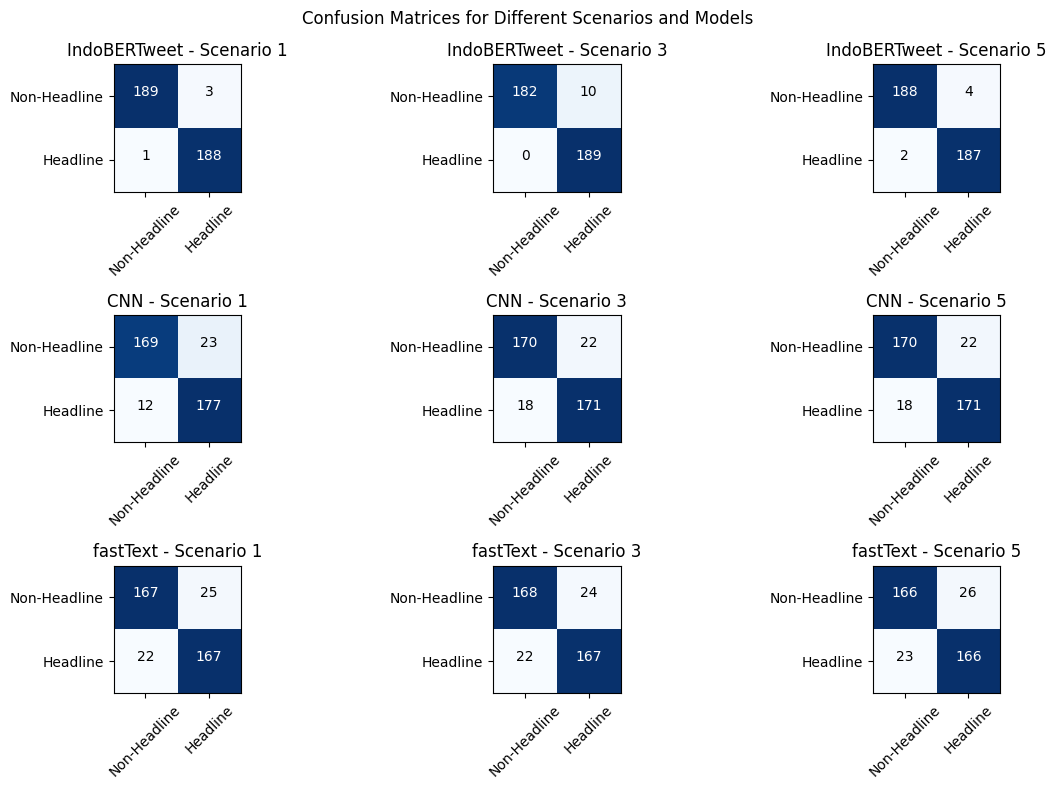

In [5]:
# Confusion Matrix - English

# Define the list of scenarios
scenarios = [1, 3, 5]

# Define the figure size
plt.figure(figsize=(12, 8))

# Define the labels for the plot
labels = ["Non-Headline", "Headline"]

# Loop through the models in the data dictionary
for model_name, model_data in data.items():
    
    # Get the data path dictionary for the model
    data_path_dict = model_data["data_path"]
    
    # Loop through the scenarios
    for scenario in scenarios:
        
        # Get the path for the data file
        data_path = data_path_dict[scenario]
        
        # Load the data into a Pandas dataframe
        df = pd.read_csv(data_path)
        
        # Extract the true labels and predicted labels
        y_true = df["labels"]
        y_pred = df["prediction"]
        
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        
        # Create a subplot for the confusion matrix
        plt.subplot(len(data), len(scenarios), (list(data.keys()).index(model_name)*len(scenarios))+scenarios.index(scenario)+1)
        
        # Plot the confusion matrix as a heatmap
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
        
        # Add the labels to the plot
        tick_marks = range(len(labels))
        plt.xticks(tick_marks, labels, rotation=45)
        plt.yticks(tick_marks, labels)
        
        # Add the number of labels to the plot
        thresh = cm.max() / 2
        for i, j in ((i, j) for i in range(len(cm)) for j in range(len(cm[0]))):
            plt.text(j, i, format(cm[i, j], "d"),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
        # Add a title to the subplot
        plt.title(f"{model_name_dict[model_name]} - Scenario {scenario}")
        
# Add a common title to the figure
plt.suptitle("Confusion Matrices for Different Scenarios and Models")

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('Confusion Matrix English.svg', format='svg', bbox_inches="tight")

# Display the plot
plt.show()




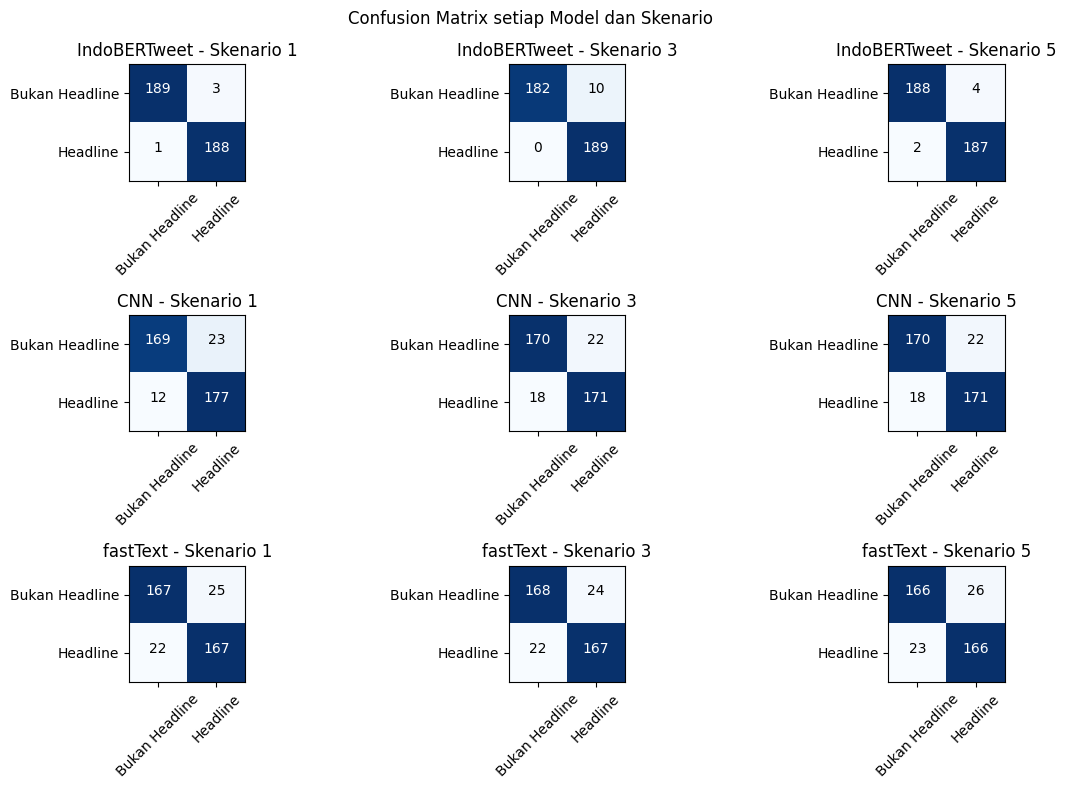

In [6]:
# Confusion Matrix - Indonesia

# Define the list of scenarios
scenarios = [1, 3, 5]

# Define the figure size
plt.figure(figsize=(12, 8))

# Define the labels for the plot
labels = ["Bukan Headline", "Headline"]

# Loop through the models in the data dictionary
for model_name, model_data in data.items():
    
    # Get the data path dictionary for the model
    data_path_dict = model_data["data_path"]
    
    # Loop through the scenarios
    for scenario in scenarios:
        
        # Get the path for the data file
        data_path = data_path_dict[scenario]
        
        # Load the data into a Pandas dataframe
        df = pd.read_csv(data_path)
        
        # Extract the true labels and predicted labels
        y_true = df["labels"]
        y_pred = df["prediction"]
        
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        
        # Create a subplot for the confusion matrix
        plt.subplot(len(data), len(scenarios), (list(data.keys()).index(model_name)*len(scenarios))+scenarios.index(scenario)+1)
        
        # Plot the confusion matrix as a heatmap
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
        
        # Add the labels to the plot
        tick_marks = range(len(labels))
        plt.xticks(tick_marks, labels, rotation=45)
        plt.yticks(tick_marks, labels)
        
        # Add the number of labels to the plot
        thresh = cm.max() / 2
        for i, j in ((i, j) for i in range(len(cm)) for j in range(len(cm[0]))):
            plt.text(j, i, format(cm[i, j], "d"),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
        # Add a title to the subplot
        plt.title(f"{model_name_dict[model_name]} - Skenario {scenario}")
        
# Add a common title to the figure
plt.suptitle("Confusion Matrix setiap Model dan Skenario")

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('Confusion Matrix Indonesia.svg', format='svg', bbox_inches="tight")

# Display the plot
plt.show()


In [14]:
import pandas as pd

data = {
    "indobertweet" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/indobertweet/5.csv",
        }
    },
    "cnn" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/cnn/5.csv",
        }
    },
    "fasttext" : {
        "data_path" : {
            1 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/1.csv",
            3 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/3.csv",
            5 : "../../../data/5. Result Analysis/Error Analysis/pred/fasttext/5.csv",
        }
    },
}

def print_confusion_matrix(data_path):
    df = pd.read_csv(data_path)
    labels = df['labels']
    predictions = df['prediction']
    
    tp = ((labels == 1) & (predictions == 1)).sum()
    fp = ((labels == 0) & (predictions == 1)).sum()
    tn = ((labels == 0) & (predictions == 0)).sum()
    fn = ((labels == 1) & (predictions == 0)).sum()
    print(f"{tp}\t{fp}\t{tn}\t{fn}")

# Iterate over the data dictionary
for model, model_data in data.items():
    print(f"Model: {model}")
    print(f"Scenario ordering:", scenario)
    for scenario, data_path in model_data['data_path'].items():
        # print(f"Scenario: {scenario}")
        # print("TP FP TN FN")
        print_confusion_matrix(data_path)


Model: indobertweet
Scenario ordering: 5
188	3	189	1
189	10	182	0
187	4	188	2
Model: cnn
Scenario ordering: 5
177	23	169	12
171	22	170	18
171	22	170	18
Model: fasttext
Scenario ordering: 5
167	25	167	22
167	24	168	22
166	26	166	23


In [7]:
# Error Prediction DataFrame

dfs = {}

for model, model_data in data.items():
    dfs[model] = {}
    for scenario, path in model_data["data_path"].items():
        df = pd.read_csv(path)
        error_mask = df["labels"] != df["prediction"]
        errors = df[error_mask].copy()
        dfs[model][scenario] = errors[['tweet',"labels", "prediction"]].reset_index(drop=True)

for model in data:
    data[model]['df_err'] = {}
    dfs_error = dfs[model]
    for scenario in dfs_error:
        data[model]['df_err'][scenario] = dfs_error[scenario].copy()

In [8]:
# Check on indobertweet errors

df_combine = []
for df in data['indobertweet']['df_err']:
    df_combine.append(data['indobertweet']['df_err'][df])

errs = pd.concat(df_combine).drop_duplicates(['tweet', 'prediction']).reset_index(drop=True)
# word_counter(errs['tweet'].to_list())
df_err_counter = word_counter(errs[errs["prediction"] == 1]['tweet'].to_list())
df_err_counter.values

array([['armando', 4],
       ['ade', 4],
       ['pranowo', 3],
       ['orang', 3],
       ['identitas', 3],
       ['politik', 3],
       ['HTTPURL', 3],
       ['langsung', 3],
       ['ganjar', 3],
       ['gubernur', 2],
       ['jalan', 2],
       ['tol,', 2],
       ['gusar', 2],
       ['jawa', 2],
       ['kebakaran', 2],
       ['padamkan', 2],
       ['mengadu', 2],
       ['bupati', 2],
       ['mendengar', 2],
       ['diperiksa', 2],
       ['rumput', 2],
       ['turun', 2],
       ['asap', 2],
       ['senjata', 2],
       ['malaysia', 2],
       ['ancam', 2],
       ['meranti,', 2],
       ['lagi,', 2],
       ['angkat', 2],
       ['gabung', 2],
       ['umat', 2],
       ['kristen', 2],
       ['terbelah', 2],
       ['anies', 2],
       ['menang,', 2],
       ['mainkan', 2],
       ['siregar,', 1],
       ['eko', 1],
       ['video', 1],
       ['cs', 1],
       ['masuk', 1],
       ['nih.', 1],
       ['lawan', 1],
       ['basmi', 1],
       ['saja.', 1],
       

In [34]:
# Check on fasttext based models errors

df_combine = []
for df in data['cnn']['df_err']:
    df_combine.append(data['cnn']['df_err'][df])

errs = pd.concat(df_combine).drop_duplicates(['tweet', 'prediction']).reset_index(drop=True)
# word_counter(errs['tweet'].to_list())
df_err_counter = word_counter(errs[errs["prediction"] == 1]['tweet'].to_list())
# errs.values
df_err_counter.values

array([['@USER', 24],
       ['cawapres', 6],
       ['jokowi', 5],
       ['turun', 5],
       ['mengadu', 4],
       ['pura', 4],
       ['ganjar', 4],
       ['pilih', 4],
       ['ade', 4],
       ['mengusung', 4],
       ['langsung', 4],
       ['pranowo', 4],
       ['armando', 4],
       ['ajang', 4],
       ['jabatan?', 3],
       ['boleh-boleh', 3],
       ['kemarin', 3],
       ['prabowo', 3],
       ['pemilih', 3],
       ['rakyat', 3],
       ['menterinya', 3],
       ['kualitas', 3],
       ['anies', 3],
       ['HTTPURL', 3],
       ['aja..', 3],
       ['lgbt', 2],
       ['tolak', 2],
       ['bilangin', 2],
       ['mereka,', 2],
       ['olahraga', 2],
       ['buka', 2],
       ['lgbt.', 2],
       ['tepatnya', 2],
       ['"diseluruh', 2],
       ['dunia', 2],
       ['sholat', 2],
       ['2024:grinning_face::beaming_face_with_smiling_eyes:', 2],
       ['tarawih', 2],
       ['najiiiiiiiiiiiiissssssssssss', 2],
       ['rapat', 2],
       ['ahok', 2],
       ['ban